In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Construct a tf.data.Dataset
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def show_img(index):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(f"Label: {class_names[train_labels[index]]}")
    plt.axis('off')
    plt.show() 

In [5]:
def plot_random():
    plt.figure(figsize=(4, 4))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        rand_index = random.choice(range(len(train_data)))
        plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
        plt.title(f"Label: {class_names[train_labels[rand_index]]}")
        plt.axis('off')
    plt.show()

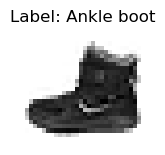

In [6]:
show_img(0)

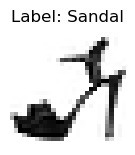

In [7]:
show_img(9)

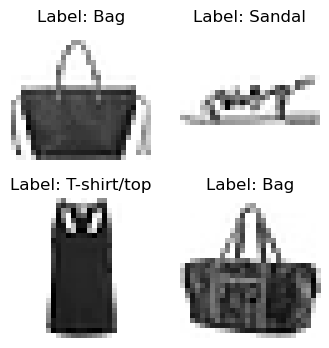

In [8]:
plot_random()

### Build a classification model
- Input shape - (28x28)
- Output shape - 10
- Loss function - Categorical Crossentropy
- Output activation - Softmax


In [9]:
model_one = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_one.compile(optimizer="adam",loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
non_norm_history = model_one.fit(train_data,
                                train_labels,
                                epochs=18,
                                validation_data=(test_data, test_labels),verbose=1)

Epoch 1/18


2023-12-06 23:07:43.152813: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 3s 1ms/step - loss: 1.1078 - accuracy: 0.7951 - val_loss: 0.5428 - val_accuracy: 0.8118
Epoch 2/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4439 - accuracy: 0.8424 - val_loss: 0.4755 - val_accuracy: 0.8290
Epoch 3/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4222 - accuracy: 0.8498 - val_loss: 0.4020 - val_accuracy: 0.8590
Epoch 4/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3910 - accuracy: 0.8586 - val_loss: 0.4192 - val_accuracy: 0.8553
Epoch 5/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3786 - accuracy: 0.8658 - val_loss: 0.4093 - val_accuracy: 0.8554
Epoch 6/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3491 - accuracy: 0.8723 - val_loss: 0.3997 - val_accuracy: 0.8600
Epoch 7/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3383 - accuracy: 0.8787 - val_loss: 0.3964 - val_accuracy: 0.8584
Epo

In [10]:
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trai

In [11]:
import pandas as pd
pd.DataFrame(non_norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.107802,0.795100,0.542797,0.8118
1,0.443943,0.842383,0.475500,0.8290
2,0.422225,0.849800,0.402025,0.8590
3,0.391001,0.858617,0.419165,0.8553
4,0.378577,0.865833,0.409254,0.8554
5,0.349085,0.872283,0.399708,0.8600
6,0.338333,0.878667,0.396353,0.8584
7,0.331425,0.880167,0.371841,0.8709
8,0.314990,0.886833,0.375524,0.8710
9,0.309234,0.888617,0.361922,0.8773


<Axes: >

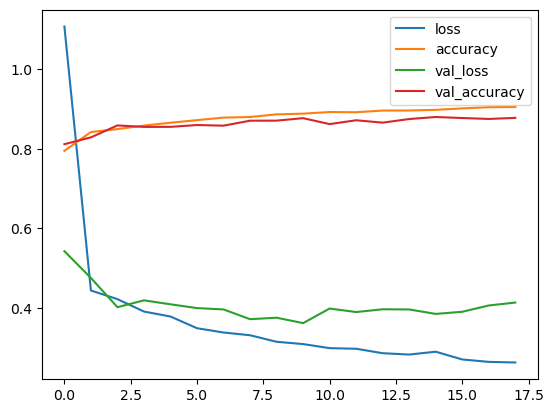

In [12]:
pd.DataFrame(non_norm_history.history).plot()

#### Pre-processing

In [13]:
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/train_data.max()

In [14]:
# train the same model
model_two = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_two.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
norm_history = model_two.fit(train_data_norm,train_labels,epochs=18,validation_data=(test_data_norm, test_labels))

Epoch 1/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4888 - accuracy: 0.8231 - val_loss: 0.4087 - val_accuracy: 0.8527
Epoch 2/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3704 - accuracy: 0.8651 - val_loss: 0.4317 - val_accuracy: 0.8307
Epoch 3/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3334 - accuracy: 0.8776 - val_loss: 0.3846 - val_accuracy: 0.8600
Epoch 4/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3081 - accuracy: 0.8863 - val_loss: 0.3560 - val_accuracy: 0.8701
Epoch 5/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.8916 - val_loss: 0.3652 - val_accuracy: 0.8757
Epoch 6/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2762 - accuracy: 0.8972 - val_loss: 0.3450 - val_accuracy: 0.8824
Epoch 7/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2638 - accuracy: 0.9013 - val_loss: 0.3283 - val_accuracy:

In [15]:
pd.DataFrame(norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.488763,0.823150,0.408700,0.8527
1,0.370410,0.865050,0.431720,0.8307
2,0.333383,0.877583,0.384612,0.8600
3,0.308086,0.886317,0.356038,0.8701
4,0.292996,0.891583,0.365197,0.8757
5,0.276216,0.897200,0.344978,0.8824
6,0.263835,0.901267,0.328261,0.8867
7,0.253704,0.904967,0.317652,0.8869
8,0.242047,0.908617,0.346584,0.8837
9,0.234079,0.911800,0.341930,0.8835


<Axes: >

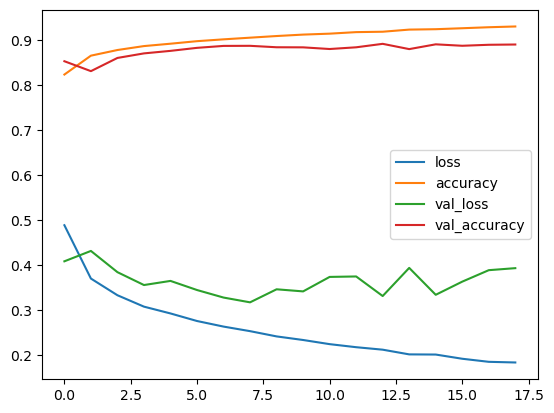

In [16]:
pd.DataFrame(norm_history.history).plot()

#### Finding the ideal learning rate !!!

In [17]:
# create the model
model_three = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"), 
])
# compile
model_three.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),metrics="accuracy")
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# fit the model
history_lr = model_three.fit(train_data_norm, train_labels, epochs=100, callbacks=[lr_scheduler],
                             validation_data=(test_data_norm,test_labels))


Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4912 - accuracy: 0.8213 - val_loss: 0.4374 - val_accuracy: 0.8417 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3749 - accuracy: 0.8635 - val_loss: 0.4034 - val_accuracy: 0.8575 - lr: 0.0011
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3434 - accuracy: 0.8727 - val_loss: 0.3813 - val_accuracy: 0.8623 - lr: 0.0013
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3264 - accuracy: 0.8794 - val_loss: 0.4002 - val_accuracy: 0.8662 - lr: 0.0014
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3150 - accuracy: 0.8842 - val_loss: 0.3630 - val_accuracy: 0.8738 - lr: 0.0016
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3063 - accuracy: 0.8882 - val_loss: 0.3668 - val_accuracy: 0.8683 - lr: 0.0018
Epoch 7/100
1875/1875 [=============================

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3453 - accuracy: 0.0991 - val_loss: 2.3616 - val_accuracy: 0.1000 - lr: 0.3548
Epoch 53/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3513 - accuracy: 0.1019 - val_loss: 2.3347 - val_accuracy: 0.1000 - lr: 0.3981
Epoch 54/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3539 - accuracy: 0.0996 - val_loss: 2.3711 - val_accuracy: 0.1000 - lr: 0.4467
Epoch 55/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3627 - accuracy: 0.0996 - val_loss: 2.3409 - val_accuracy: 0.1000 - lr: 0.5012
Epoch 56/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3672 - accuracy: 0.1003 - val_loss: 2.3568 - val_accuracy: 0.1000 - lr: 0.5623
Epoch 57/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3738 - accuracy: 0.0996 - val_loss: 2.3707 - val_accuracy: 0.1000 - lr: 0.6310
Epoch 58/100
1875/1875 [==============================] - 3

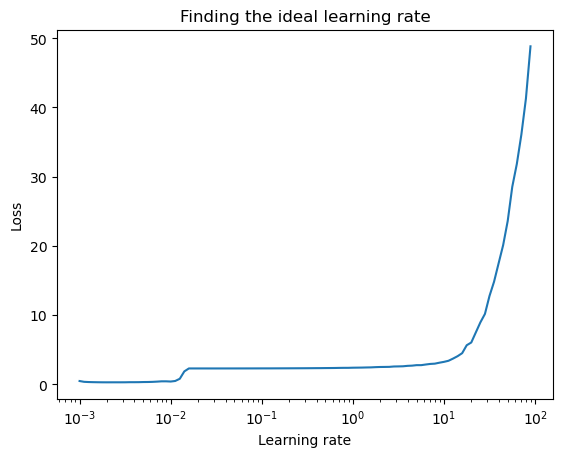

In [18]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history_lr.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

**Ideal learning rate is 0.001 ie 1e-3**

### Evaluating our model

In [19]:
# train the different activation function
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
model_four = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(256, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(128, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(64, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(10, activation='softmax')
])
# compile
model_four.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
history_four = model_four.fit(train_data_norm,train_labels,epochs=20,
                              validation_data=(test_data_norm, test_labels),verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4992 - accuracy: 0.8177 - val_loss: 0.4636 - val_accuracy: 0.8284
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3973 - accuracy: 0.8553 - val_loss: 0.4219 - val_accuracy: 0.8460
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3639 - accuracy: 0.8682 - val_loss: 0.4071 - val_accuracy: 0.8547
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3428 - accuracy: 0.8735 - val_loss: 0.3887 - val_accuracy: 0.8619
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3260 - accuracy: 0.8791 - val_loss: 0.3657 - val_accuracy: 0.8692
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8853 - val_loss: 0.3710 - val_accuracy: 0.8688
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3020 - accuracy: 0.8875 - val_loss: 0.3925 - val_accuracy:

In [20]:
pd.DataFrame(history_four.history)

,loss,accuracy,val_loss,val_accuracy
0,0.499173,0.817750,0.463571,0.8284
1,0.397342,0.855267,0.421950,0.8460
2,0.363932,0.868217,0.407084,0.8547
3,0.342819,0.873500,0.388749,0.8619
4,0.326022,0.879117,0.365653,0.8692
5,0.311455,0.885283,0.370996,0.8688
6,0.302045,0.887517,0.392522,0.8634
7,0.291850,0.892067,0.352641,0.8746
8,0.281455,0.894717,0.390715,0.8638
9,0.273069,0.898250,0.365963,0.8749


<Axes: >

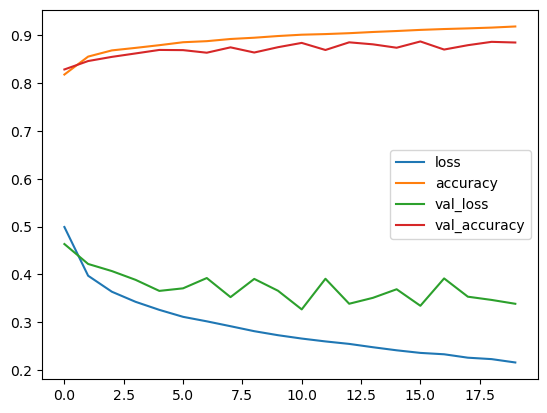

In [21]:
pd.DataFrame(history_four.history).plot()

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def plot_confusion_matrix(model):
    predictions = np.argmax(model.predict(test_data_norm), axis=1)
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, predictions)
    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

313/313 [==============================] - 0s 602us/step


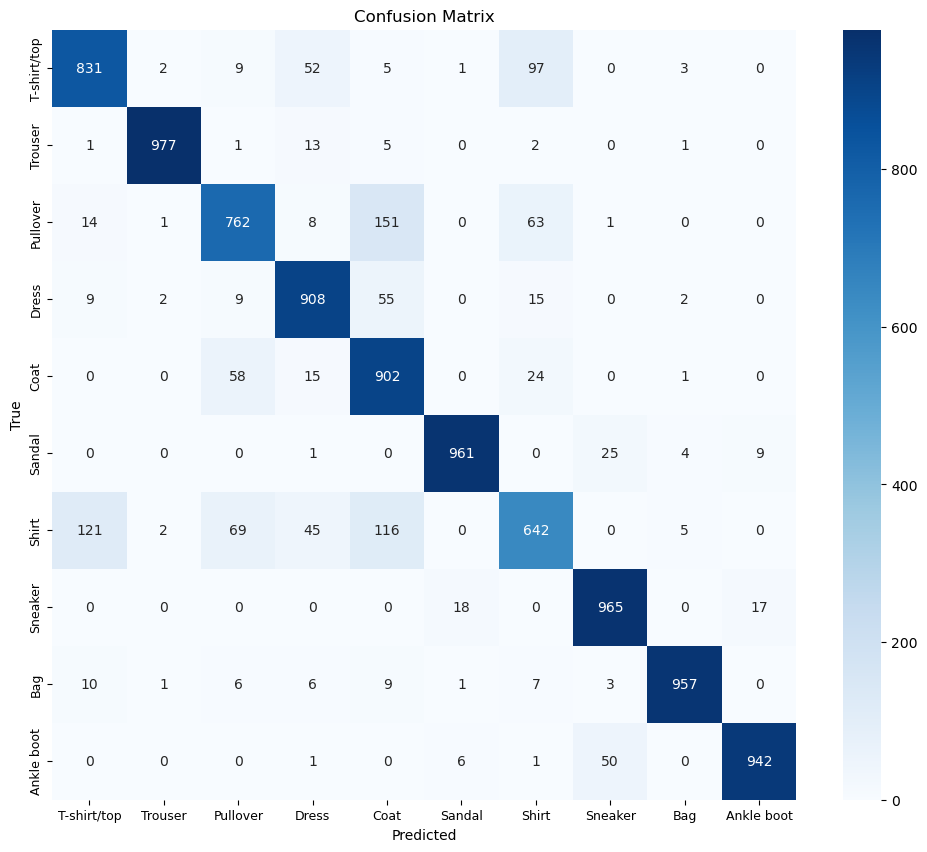

In [24]:
plot_confusion_matrix(model_two)

In [79]:
def plot_random_preds(model):
    randint = random.randint(0, len(test_data_norm))
    target_image = test_data_norm[randint]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = class_names[pred_probs.argmax()]
    true_label = class_names[test_labels[randint]]
    
    #plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    # Add xlabel information (prediction/true label)
    plt.xlabel("Label:{} Pred: {} {:2.0f}% (True: {})".format(randint,pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 14ms/step


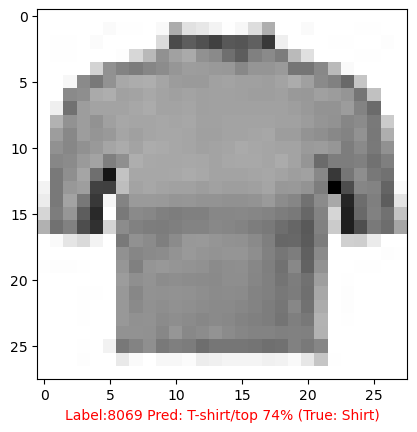

In [83]:
plot_random_preds(model_two)

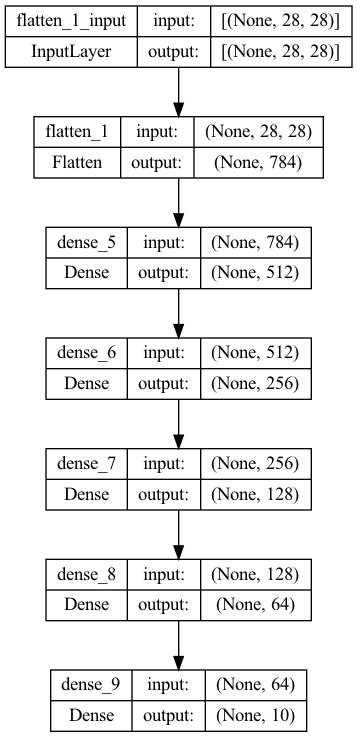

In [84]:
# More visualizations
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_two, show_shapes=True)

Note: you may need to restart the kernel to use updated packages.
